# Random Forests (Rastgele Ormanlar) 

- Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- **Ağaçlar** için;

  **Gözlemler, bootstrap( bagging) ratgele örnek seçim yöntemi ile seçilir.**
  
  **Değişkenler, random subspace yöntemi ile seçilir.**

- Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
- Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçlarının performans değerlendirmesi ve değişken öneminin belilrlenmesi için kullanılır.
- Her düğüm noktasında (yani dallanmanın olduğu yerde) rastgele değişken seçimi yapılır. (Regresyonda p/3, Sınıflandırmada karekök p), **p: değişken sayısı**

- **Topluluk Öğrenme Yöntemleri:** 

Birden fazla algoritmanın ya da birden fazla ağacın bir araya gelerek toplu bir şekilde öğrenmesi ve tahmin etmeye çalışmasıdır. 
- **Bagging (Bootstrap Aggregating) Yöntemi**

Temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminleri bir araya getirilerek değerlendirilmesine dayanır.

Bu çalışma prensibinin kilit noktası bootstrap rastgele örnekleme yöntemidir.

Bootstrap rastgele örnekleme yöntemi, gözlem birimlerinin içinden yerine koymalı bir şekilde tekrar tekrar örnek çekmek demektir.

Hata kareler ortamlamasının karekökü (RMSE) değerini düşürür.

Doğru sınıflandırma oranını arttırır.

Varyansı düşürür ve ezberlemeye karşı dayanıklıdır.

**Gerekli Kütüphaneler** 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import  neighbors
from sklearn.svm import SVR

In [29]:
# Uyarı Mesajları ile Karşılaşmamak için bu kütüphaneyi kullanıyoruz.
from warnings import filterwarnings
filterwarnings("ignore")

# Random Forests - Model ve Tahmin İşlemleri 

In [30]:
df = pd.read_csv("./Hitters.csv")
# bu csv dosyasının içerisinde eksik gözlemleri(NA) çıkardık.
df = df.dropna()

# Veri seti içerisindeki kategorik değişkenleri dummy değişkenlere çeviriyoruz.
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

# bağımlı değişken
y = df[["Salary"]]

# Veri Setinin içerisinden Bağımlı Değişkeni ve Kategorik değişkenlerin ilk hallerini dışarı bırakıyoruz.
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

# dms ile X_ birleştirip(concat) bağımsız değişken oluşturduk.
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)

# train ve test setlerimizi oluşturuyoruz.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state= 42) 

**Model**

In [54]:
rf_model = RandomForestRegressor(random_state= 42).fit(X_train,y_train)

In [55]:
rf_model

RandomForestRegressor(random_state=42)

In [56]:
?rf_model

Type:        RandomForestRegressor
String form: RandomForestRegressor(random_state=42)
Length:      100
File:        c:\users\halil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, whic

In [57]:
## İlkel hatamız 
y_ped = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_ped))

345.00286717448006

## Model Tuning

In [52]:
rf_model = RandomForestRegressor(random_state= 42).fit(X_train,y_train)
rf_model

RandomForestRegressor(random_state=42)

In [53]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200,500,1000,2000],
            "min_samples_split": [2,10,80,100]}

In [37]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv= 10, n_jobs= -1, verbose= 2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


In [62]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

**Final Modeli**

In [66]:
rf_model = RandomForestRegressor(random_state= 42,
                                 max_depth= 8, 
                                 max_features= 2,
                                 min_samples_split= 2,
                                 n_estimators= 200)
rf_tuned = rf_model.fit(X_train,y_train)

In [67]:
y_pred_tuned = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

348.6776176416439

## Değişken Önem Düzeyi

In [73]:
# değişkenlerin önemleri
rf_tuned.feature_importances_*100

array([5.83939512, 6.3008207 , 3.55409652, 4.19009209, 4.66682274,
       4.98433247, 7.38060012, 9.73911031, 8.6905022 , 7.87635556,
       8.72726849, 8.31591059, 9.70373415, 4.70960845, 2.05129065,
       1.85358891, 0.3831876 , 0.55522635, 0.47805698])

In [74]:
X_train.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [77]:
y_test.columns

Index(['Salary'], dtype='object')

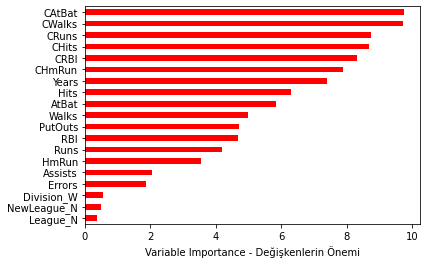

In [80]:
#Importance isimli bir dataframe oluşturuyoruz.
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                         index=X_train.columns)
# Importance dataframe indejş değerleri sıralıyoruz.
Importance.sort_values(by='Importance',# Importance sütununa göre yapıyoruz
                      axis = 0, # satır bazında bir sıralama olmasını sağlıyoruz.
                      ascending = True).plot(kind = 'barh', # sütun gragiği
                                             color ='r')
plt.xlabel("Variable Importance - Değişkenlerin Önemi")
plt.gca().legend_ = None